# A. Group Assignment By GONG Kuiyuan

# 1A. Importing data

## 1.1 Importing data from local file

### 1.1.1 Basic information of the data
- I have downloaded data from the source: **Food and Agriculture Organization of the United Nations (FAO)**
    - The FAO CPI dataset for all items(or general CPI) and the Food CPI, consists of a complete and consistent set of time series from January 2000 onwards. Data gaps on monthly Food CPI and General CPI are filled using statistical estimation procedures to have full data coverage for all countries for Food CPI and for General CPI. 
    - These indices measure the price change between the current and reference periods of the average basket of goods and services purchased by households.

In [3]:
url = "https://data360.worldbank.org/en/dataset/FAO_CP?country=WLD"
url
print(f"More description of the data: {url}")

More description of the data: https://data360.worldbank.org/en/dataset/FAO_CP?country=WLD


### 1.1.2 Importing the data from local `csv` file

In [2]:
import pandas as pd
import os
os. getcwd()
print(os. getcwd())

/Users/edisonkung/Desktop/Data Science for Public Policy/GRASSP2025_AgriEcon/notebooks


In [4]:
df = pd.read_csv("../data/raw/FAO_CP.csv")
df.head(5)

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public


## 1.2 Processing data

### 1.2.1 Descriptive statistics

In [5]:
df.REF_AREA_LABEL.unique() #show unique values in REF_AREA_LABEL, which is the country name.

array(['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'Hong Kong SAR, China', 'Macao SAR, China', 'China',
       'Colombia', 'Comoros', 'Congo, Rep.', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Congo, Dem. Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswati

In [7]:
list(df. columns)
df.list = list(df. columns)
df.list

/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_56259/3096353865.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.list = list(df. columns)


['STRUCTURE',
 'STRUCTURE_ID',
 'ACTION',
 'FREQ',
 'FREQ_LABEL',
 'REF_AREA',
 'REF_AREA_LABEL',
 'INDICATOR',
 'INDICATOR_LABEL',
 'SEX',
 'SEX_LABEL',
 'AGE',
 'AGE_LABEL',
 'URBANISATION',
 'URBANISATION_LABEL',
 'UNIT_MEASURE',
 'UNIT_MEASURE_LABEL',
 'COMP_BREAKDOWN_1',
 'COMP_BREAKDOWN_1_LABEL',
 'COMP_BREAKDOWN_2',
 'COMP_BREAKDOWN_2_LABEL',
 'COMP_BREAKDOWN_3',
 'COMP_BREAKDOWN_3_LABEL',
 'TIME_PERIOD',
 'OBS_VALUE',
 'AGG_METHOD',
 'AGG_METHOD_LABEL',
 'DATABASE_ID',
 'DATABASE_ID_LABEL',
 'UNIT_MULT',
 'UNIT_MULT_LABEL',
 'UNIT_TYPE',
 'UNIT_TYPE_LABEL',
 'TIME_FORMAT',
 'TIME_FORMAT_LABEL',
 'OBS_STATUS',
 'OBS_STATUS_LABEL',
 'OBS_CONF',
 'OBS_CONF_LABEL']

### 1.2.2 Renaming columns

In [8]:
cols = ["FREQ_LABEL", "REF_AREA_LABEL", "INDICATOR_LABEL", "TIME_PERIOD", "OBS_VALUE"]
df_cpi = df[cols]
df_cpi.head (5)

,FREQ_LABEL,REF_AREA_LABEL,INDICATOR_LABEL,TIME_PERIOD,OBS_VALUE
0,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-01,16.177260
1,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-02,16.581955
2,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-03,16.986650
3,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-04,17.391345
4,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-05,17.796040


In [9]:
column_dictionary = {
    "FREQ_LABEL": "Frequency",
    "REF_AREA_LABEL": "Country",
    "INDICATOR_LABEL": "Indicator",
    "TIME_PERIOD": "Date",
    "OBS_VALUE": "CPI Value"
} 
df_cpi.rename(column_dictionary, axis=1). head(5)
df_cpi = df_cpi.rename(column_dictionary, axis=1)
df_cpi


,Frequency,Country,Indicator,Date,CPI Value
0,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-01,16.177260
1,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-02,16.581955
2,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-03,16.986650
3,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-04,17.391345
4,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-05,17.796040
...,...,...,...,...,...
179723,Monthly,South Asia,Food price inflation (FAO_CP),2024-05,13.713255
179724,Monthly,South Asia,Food price inflation (FAO_CP),2024-06,15.747410
179725,Monthly,South Asia,Food price inflation (FAO_CP),2024-07,14.716090
179726,Monthly,South Asia,Food price inflation (FAO_CP),2024-08,14.578844


### 1.2.3 Creating subsets

In [10]:
df_cpi.query("Indicator == 'Consumer Prices, General Indices (2015 = 100) (FAO_CP)'")
df_cpi = df_cpi.query("Indicator == 'Consumer Prices, General Indices (2015 = 100) (FAO_CP)'")
df_cpi

,Frequency,Country,Indicator,Date,CPI Value
0,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-01,16.177260
1,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-02,16.581955
2,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-03,16.986650
3,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-04,17.391345
4,Monthly,Afghanistan,"Consumer Prices, General Indices (2015 = 100) ...",2000-05,17.796040
...,...,...,...,...,...
61467,Monthly,South Asia,"Consumer Prices, General Indices (2015 = 100) ...",2024-05,259.132149
61468,Monthly,South Asia,"Consumer Prices, General Indices (2015 = 100) ...",2024-06,263.735323
61469,Monthly,South Asia,"Consumer Prices, General Indices (2015 = 100) ...",2024-07,268.535022
61470,Monthly,South Asia,"Consumer Prices, General Indices (2015 = 100) ...",2024-08,271.143792


In [11]:
Country_name = df_cpi.Country.unique()
Country_name

array(['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'Hong Kong SAR, China', 'Macao SAR, China', 'China',
       'Colombia', 'Comoros', 'Congo, Rep.', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Congo, Dem. Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswati

In [12]:

df_cpi.query("Country in ['Congo, Dem. Rep.', 'Burkina Faso', 'Ghana', 'South Africa', 'Zambia', 'Zimbabwe']")
df_cpi = df_cpi.query("Country in ['Congo, Dem. Rep.', 'Burkina Faso', 'Ghana', 'South Africa', 'Zambia', 'Zimbabwe']")
df_cpi

,Frequency,Country,Indicator,Date,CPI Value
9165,Monthly,Burkina Faso,"Consumer Prices, General Indices (2015 = 100) ...",2000-01,68.613798
9166,Monthly,Burkina Faso,"Consumer Prices, General Indices (2015 = 100) ...",2000-02,68.417945
9167,Monthly,Burkina Faso,"Consumer Prices, General Indices (2015 = 100) ...",2000-03,68.287376
9168,Monthly,Burkina Faso,"Consumer Prices, General Indices (2015 = 100) ...",2000-04,68.287376
9169,Monthly,Burkina Faso,"Consumer Prices, General Indices (2015 = 100) ...",2000-05,70.050052
...,...,...,...,...,...
60576,Monthly,Zimbabwe,"Consumer Prices, General Indices (2015 = 100) ...",2023-04,13836.495247
60577,Monthly,Zimbabwe,"Consumer Prices, General Indices (2015 = 100) ...",2023-05,16014.357247
60578,Monthly,Zimbabwe,"Consumer Prices, General Indices (2015 = 100) ...",2023-06,27938.725123
60579,Monthly,Zimbabwe,"Consumer Prices, General Indices (2015 = 100) ...",2023-07,23677.097901


### 1.2.4 Saving subsets to target folder

In [13]:
df_cpi.to_csv("../data/processed/Africa_1.csv", index=False)

### 1.2.5 Plotting

In [14]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Date'>

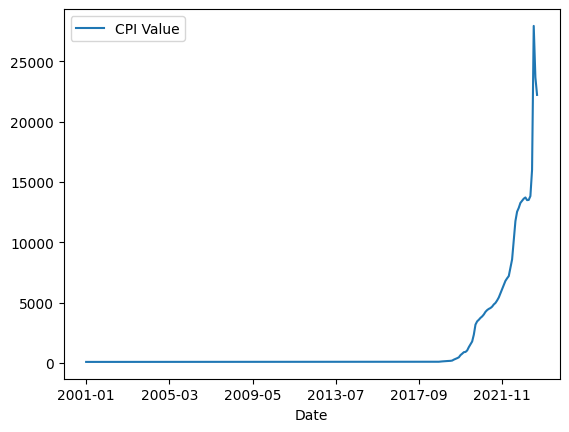

In [15]:
import matplotlib.pyplot as plt
df_cpi.query("Country == 'Zimbabwe'").set_index('Date')['2001':].plot()

In [29]:
df_cpi['Date'].dtype
df_cpi['Date'] = pd.to_datetime(df_cpi['Date'])
df_cpi.to_csv("../data/processed/Africa_CPI.csv", index=False)

/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_56259/293328613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['Date'] = pd.to_datetime(df_cpi['Date'])


<Axes: xlabel='Date'>

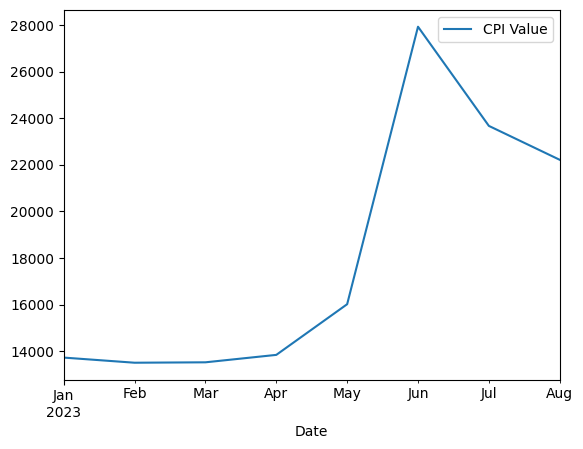

In [17]:
df_cpi.query("Country == 'Zimbabwe'").set_index('Date').loc['2023-01-01':'2023-12-01'].plot()

# 1B. Importing data

### 1. 1 Processing Food Price Inflation (FPI) index

In [30]:
df = pd.read_csv("../data/raw/FAO_CP.csv")
column_dictionary = {
    "FREQ_LABEL": "Frequency",
    "REF_AREA_LABEL": "Country",
    "INDICATOR_LABEL": "Indicator",
    "TIME_PERIOD": "Date",
    "OBS_VALUE": "FPI Value"
}
df_infl = df.rename(column_dictionary, axis=1)
df_infl.head(2)

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,Frequency,REF_AREA,Country,INDICATOR,Indicator,SEX,...,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,M,Monthly,AFG,Afghanistan,FAO_CP_23012,"Consumer Prices, General Indices (2015 = 100) ...",_T,...,0,Units,IX,Index,610,CCYYMM,A,Normal value,PU,Public


In [32]:
df_infl = df_infl.query("Country in ['Congo, Dem. Rep.', 'Burkina Faso', 'Ghana', 'South Africa', 'Zambia', 'Zimbabwe']")[["Frequency", "Country", "Indicator", "Date", "FPI Value"]].dropna()
df_infl.tail(2)

,Frequency,Country,Indicator,Date,FPI Value
178871,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-07,103.098144
178872,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-08,70.758637


In [33]:
df_infl = df_infl.query("Indicator == 'Food price inflation (FAO_CP)'")
df_infl

,Frequency,Country,Indicator,Date,FPI Value
130580,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-01,1.510067
130581,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-02,3.401361
130582,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-03,11.016949
130583,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-04,6.925676
130584,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-05,7.407407
...,...,...,...,...,...
178868,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-04,101.641652
178869,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-05,116.960656
178870,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-06,255.596454
178871,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-07,103.098144


In [34]:
df_infl['Date'].dtype
df_infl
df_fpi = df_infl
df_fpi

,Frequency,Country,Indicator,Date,FPI Value
130580,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-01,1.510067
130581,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-02,3.401361
130582,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-03,11.016949
130583,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-04,6.925676
130584,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-05,7.407407
...,...,...,...,...,...
178868,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-04,101.641652
178869,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-05,116.960656
178870,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-06,255.596454
178871,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-07,103.098144


In [ ]:
df_fpi.to_csv("../data/processed/Africa_FPI.csv", index=False)
df_fpi

,Frequency,Country,Indicator,Date,FPI Value
130580,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-01,1.510067
130581,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-02,3.401361
130582,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-03,11.016949
130583,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-04,6.925676
130584,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-05,7.407407
...,...,...,...,...,...
178868,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-04,101.641652
178869,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-05,116.960656
178870,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-06,255.596454
178871,Monthly,Zimbabwe,Food price inflation (FAO_CP),2023-07,103.098144


In [38]:
df_fpi['Date'] = pd.to_datetime(df_fpi['Date'])
df_cpi['Date'] = pd.to_datetime(df_cpi['Date'])

# Now perform the merge
df_merged = pd.merge(
    df_fpi,
    df_cpi,
    on=["Frequency", "Country", "Date"],
    how="inner",
)

df_merged.head(5)

/var/folders/g9/jqt9rdw11_3dp7gkn_dfw_9m0000gn/T/ipykernel_56259/2353114699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['Date'] = pd.to_datetime(df_cpi['Date'])


,Frequency,Country,Indicator_x,Date,FPI Value,Indicator_y,CPI Value
0,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-01-01,1.510067,"Consumer Prices, General Indices (2015 = 100) ...",71.029317
1,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-02-01,3.401361,"Consumer Prices, General Indices (2015 = 100) ...",71.094601
2,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-03-01,11.016949,"Consumer Prices, General Indices (2015 = 100) ...",72.857277
3,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-04-01,6.925676,"Consumer Prices, General Indices (2015 = 100) ...",72.008581
4,Monthly,Burkina Faso,Food price inflation (FAO_CP),2001-05-01,7.407407,"Consumer Prices, General Indices (2015 = 100) ...",73.248983


# 2. Merging data

### 2.1 Merging CPI and FPI data

In [42]:
df_merged.to_csv("../data/processed/Africa_merged.csv", index=True)
df_merged.head(5)

,Country,Date,Frequency,FPI_indicator,FPI Value,CPI_indicator,CPI Value
0,Burkina Faso,2001-01-01,Monthly,Food price inflation (FAO_CP),1.510067,"Consumer Prices, General Indices (2015 = 100) ...",71.029317
1,Burkina Faso,2001-02-01,Monthly,Food price inflation (FAO_CP),3.401361,"Consumer Prices, General Indices (2015 = 100) ...",71.094601
2,Burkina Faso,2001-03-01,Monthly,Food price inflation (FAO_CP),11.016949,"Consumer Prices, General Indices (2015 = 100) ...",72.857277
3,Burkina Faso,2001-04-01,Monthly,Food price inflation (FAO_CP),6.925676,"Consumer Prices, General Indices (2015 = 100) ...",72.008581
4,Burkina Faso,2001-05-01,Monthly,Food price inflation (FAO_CP),7.407407,"Consumer Prices, General Indices (2015 = 100) ...",73.248983


In [43]:
df_merged = df_merged.rename(columns={"Indicator_x": "FPI_indicator", "Indicator_y": "CPI_indicator"})
df_merged = df_merged[[ "Country","Date", "Frequency", "FPI_indicator", "FPI Value", "CPI_indicator", "CPI Value"]]
df_merged.head(2)

,Country,Date,Frequency,FPI_indicator,FPI Value,CPI_indicator,CPI Value
0,Burkina Faso,2001-01-01,Monthly,Food price inflation (FAO_CP),1.510067,"Consumer Prices, General Indices (2015 = 100) ...",71.029317
1,Burkina Faso,2001-02-01,Monthly,Food price inflation (FAO_CP),3.401361,"Consumer Prices, General Indices (2015 = 100) ...",71.094601


### 2.2 Plotting CPI and FPI indexes

<Axes: xlabel='Date'>

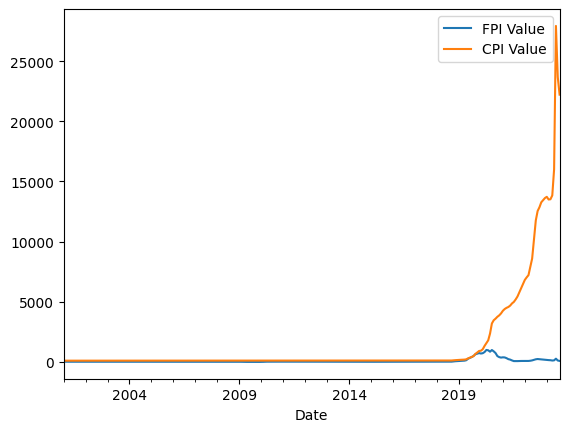

In [44]:
df_merged.query("Country == 'Zimbabwe'").set_index('Date')['2001':].plot()

In [45]:
import os

file_path = "../data/processed/Africa_1.csv"

if os.path.exists(file_path):
    os.remove(file_path)
    print("Deleted")
else:
    print("File does not exist")

Deleted
